<a href="https://colab.research.google.com/github/Yasmine-ChemP/GMCtraining/blob/main/CP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf

In [ ]:
#Run Me Please
!pip -q install pydot_ng
!pip -q install graphviz
!apt install graphviz > /dev/null

from __future__ import absolute_import, division, print_function

import tensorflow as tf
# import tensorflow.contrib.eager as tfe
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# try:
#   tf.enable_eager_execution()
#   print('Running in Eager mode.')
# except ValueError:
#   print('Already running in Eager mode')

from __future__ import print_function, division
from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications.inception_v3 import inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Flatten

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pickle
from sklearn.utils import shuffle

In [ ]:
# Load pickled data


training_file = '/content/gdrive/MyDrive/Neural Network and Deep Learning/train.p'
validation_file= '/content/gdrive/MyDrive/Neural Network and Deep Learning/valid.p'
testing_file = '/content/gdrive/MyDrive/Neural Network and Deep Learning/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


In [ ]:

import pandas as pd
signs = []
signnames = pd.read_csv('/content/gdrive/MyDrive/Neural Network and Deep Learning/Signnames.csv', delimiter=',', header=0)
for row in range(signnames.shape[0]):
     signs.append(signnames.iloc[row, 1])    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:

#  Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of test examples.
n_test = X_test.shape[0]

#  What's the shape of a traffic sign image?
image_shape = X_test[0].shape

#  How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of valid examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of valid examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [ ]:
y_train.shape

(34799,)

In [ ]:
# In this part should One-hot encode all Y-s vectors using
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

y_tr= encoder.fit_transform(np.reshape(y_train,(-1,1)))
y_ts= encoder.fit_transform(np.reshape(y_test,(-1,1)))
y_val= encoder.fit_transform(np.reshape(y_valid,(-1,1)))

In [ ]:
print(y_tr.shape)
print(y_ts.shape)
print(y_val.shape)

(34799, 43)
(12630, 43)
(4410, 43)


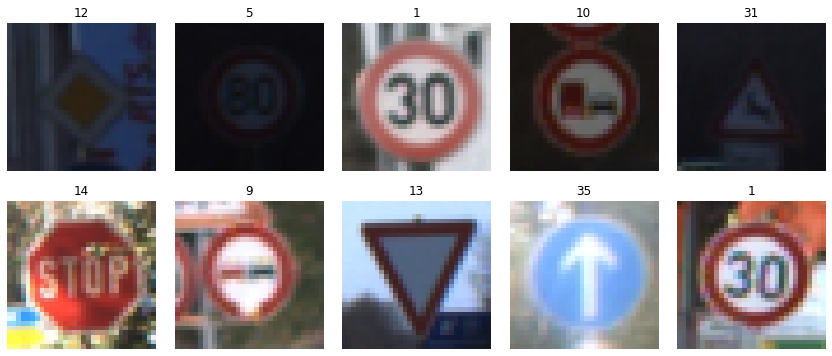

In [ ]:
### Data exploration visualization 
import matplotlib.pyplot as plt
import random
.
%matplotlib inline
def show_images(X,Y,r,c):
  fig, axs = plt.subplots(r,c, figsize=(15, 6))
  fig.subplots_adjust(hspace = .2, wspace=.001)
  axs = axs.ravel()
  for i in range(10): # if rows = 2 and columns = 5 i should take 10 values
      index = random.randint(0, len(X))
      image = X[index]
      axs[i].axis('off')
      axs[i].imshow(image)
      axs[i].set_title(Y[index])
  plt.show()    

# show image of 10 random data points
rows = 2
columns = 5
show_images (X_train, y_train,rows, columns)

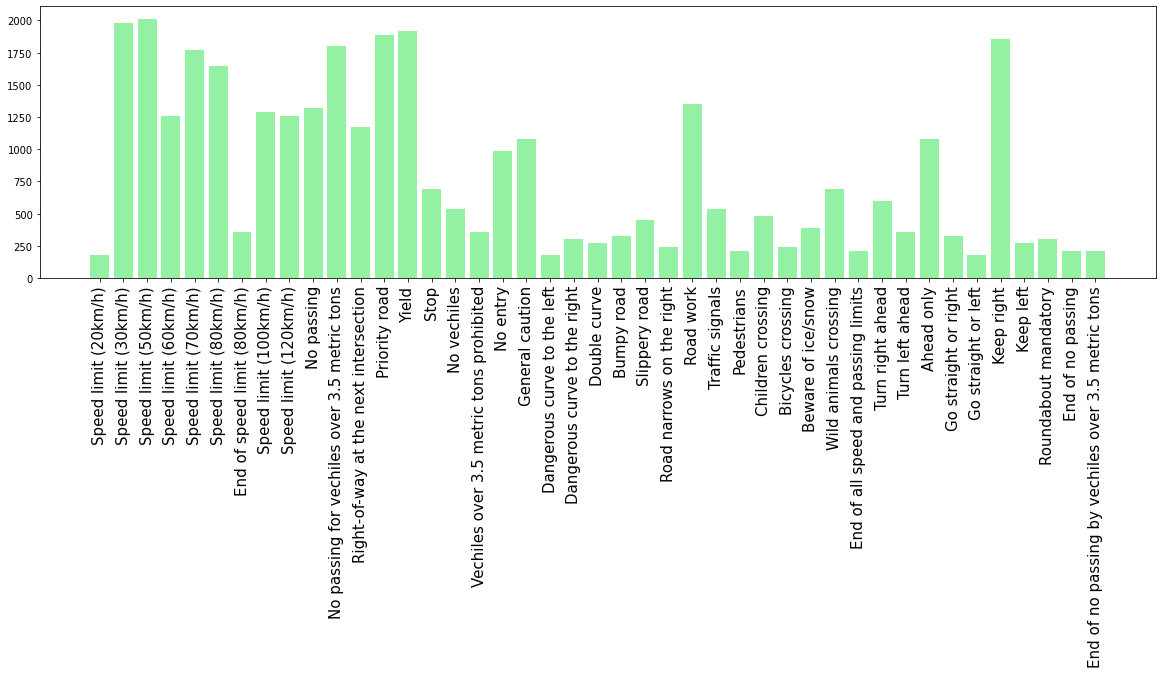

In [ ]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_train, return_counts=True)

names = signnames['SignName']
y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.9,0.4,0.6) )

plt.xticks(y_pos, names, fontsize=15, rotation=90)

plt.show()

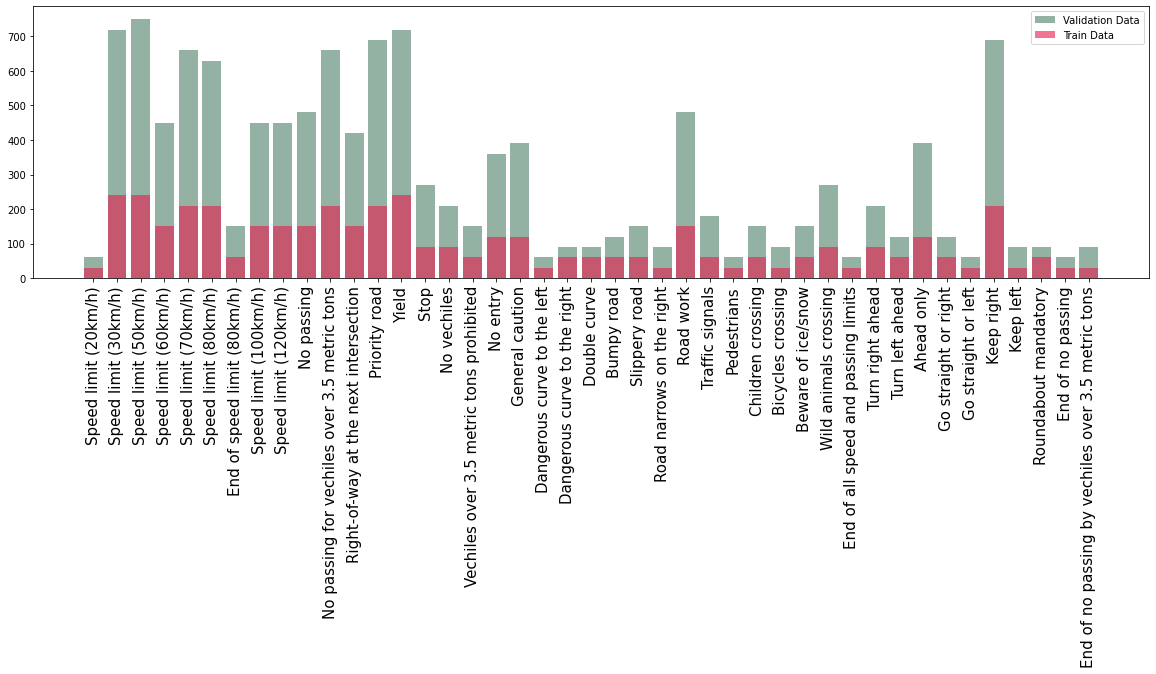

In [ ]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_test, return_counts=True)
item1, count1 = np.unique(y_valid, return_counts=True)

names = signnames['SignName']
names1 = signnames['SignName']

y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.5,0.4,0.2), label="Validation Data" )

plt.bar(item1, count1, alpha=0.6, color = (0.9,0.1,0.3,0.2), label="Train Data" )

plt.xticks(y_pos, names, fontsize=15, rotation=90)
plt.legend()
plt.show()

In [ ]:
# gray scale
#X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)
#X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
#X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

In [ ]:
# normalization Here 
import numpy as np
X_train = np.array(X_train,dtype = np.float32)/255
X_test = np.array(X_test,dtype = np.float32)/255
X_valid = np.array(X_valid,dtype = np.float32)/255

In [ ]:
# Shuffle your data here 
from sklearn.utils import shuffle
X_train , y_tr = shuffle(X_train, y_tr)
X_test , y_ts = shuffle(X_test, y_ts)
X_valid , y_val = shuffle(X_valid, y_val)

In [ ]:
train_ds= tf.data.Dataset.from_tensor_slices((X_train,y_tr))
val_ds= tf.data.Dataset.from_tensor_slices((X_valid,y_val))
test_ds=tf.data.Dataset.from_tensor_slices((X_test, y_ts))

In [ ]:
train_ds= train_ds.cache().batch(256,drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_ds= val_ds.cache().batch(256,drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_ds= test_ds.cache().batch(256,drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [ ]:
#data augmentation 
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
   
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#creation du model (sans data augmentation /sans transfer learning)
def build_model():
  input=layers.Input(shape=(32,32,3))

  x=layers.Conv2D(64,kernel_size=(3,3), activation='relu', padding="same")(input)
  x=layers.Conv2D(128,kernel_size=(3,3), activation='relu', padding="same")(x)
  x=layers.MaxPool2D()(x)

  x=layers.Conv2D(128,kernel_size=(3,3),  activation='relu', padding="same")(x)
  x=layers.Conv2D(128,kernel_size=(3,3), activation='relu', padding="same")(x)
  x=layers.MaxPool2D()(x)

  x=layers.Flatten()(x)
  x=layers.Dense(128, activation='relu')(x)
  output=layers.Dense(43, activation="softmax")(x)

  model=keras.Model(inputs=input, outputs=output)
  return model 

model=build_model()
model.summary()
  


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                             

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"] )

In [ ]:
history=model.fit(X_train, y_tr,batch_size=256, epochs=25, validation_data=(X_valid,y_val))

Epoch 1/25
136/136 [==============================] - 20s 60ms/step - loss: 1.8729 - accuracy: 0.4879 - val_loss: 0.7372 - val_accuracy: 0.7887
Epoch 2/25
136/136 [==============================] - 7s 52ms/step - loss: 0.1571 - accuracy: 0.9573 - val_loss: 0.3567 - val_accuracy: 0.8946
Epoch 3/25
136/136 [==============================] - 7s 52ms/step - loss: 0.0434 - accuracy: 0.9894 - val_loss: 0.3272 - val_accuracy: 0.9152
Epoch 4/25
136/136 [==============================] - 7s 53ms/step - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.2868 - val_accuracy: 0.9295
Epoch 5/25
136/136 [==============================] - 8s 58ms/step - loss: 0.0138 - accuracy: 0.9963 - val_loss: 0.3353 - val_accuracy: 0.9299
Epoch 6/25
136/136 [==============================] - 8s 58ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.3380 - val_accuracy: 0.9277
Epoch 7/25
136/136 [==============================] - 7s 52ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.3878 - val_accuracy: 0.910

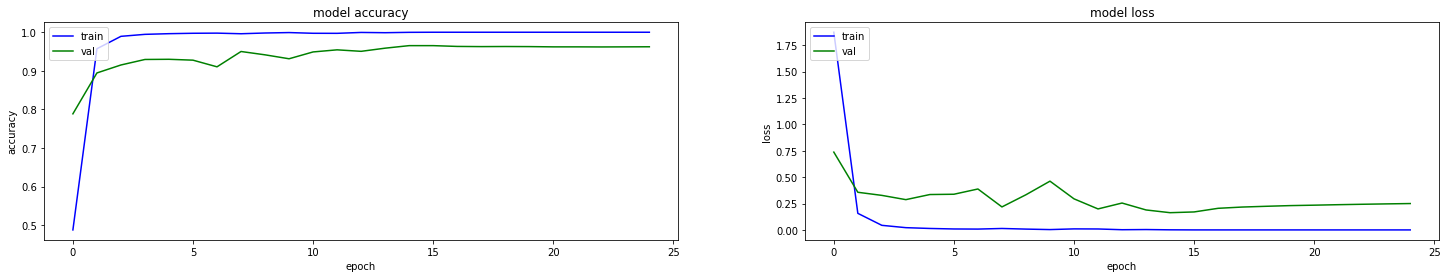

In [ ]:
#Courbe d'apprentissage et de loss
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25,4)

ax1.plot(model.history.history['accuracy'],'b')
ax1.plot(model.history.history['val_accuracy'],'g')
ax1.set_title('model accuracy')
ax1.set(xlabel="epoch",ylabel="accuracy")
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(model.history.history['loss'],'b')
ax2.plot(model.history.history['val_loss'],'g')
ax2.set_title('model loss')
ax2.set(xlabel="epoch",ylabel="loss")
ax2.legend(['train', 'val'], loc='upper left')

In [ ]:
#Evaluation du modèle.
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

49/49 - 1s - loss: 0.4028 - accuracy: 0.9556 - 1s/epoch - 29ms/step

Test accuracy: 95.55963277816772 %


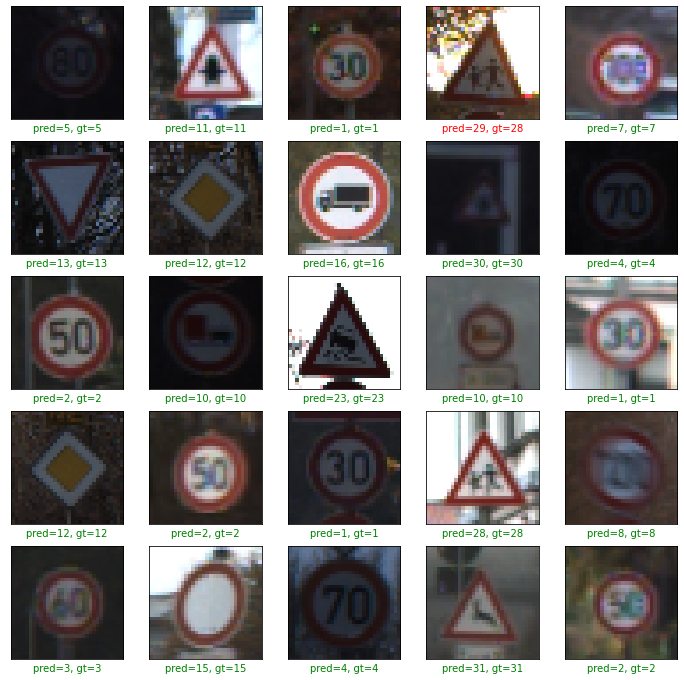

In [ ]:
preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
index = random.randint(0, 12630)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[index+i])
    gt = np.argmax(y_ts[index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('pred={}, gt={}'.format(pred, gt), color=col)
    plt.imshow(X_test[index+i])
plt.show()

In [ ]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16

base_conv= VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(32,32,3))


In [ ]:
base_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#base_conv.trainable = False
model.trainable = True
for layer in base_conv.layers[:-13]:
  layer.trainable = False

def build_transfer_model():
  input= layers.Input((32,32,3))
  x= data_augmentation(input)
  x = base_conv(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256,activation='relu')(x)
  #x = layers.Dropout(0.3)(x)
  output = layers.Dense(43,activation='softmax')(x)
  model = keras.Model(inputs=input,outputs=output)
  return model

model = build_transfer_model()

In [ ]:
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_18 (Flatten)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 43)                11051     
                                                                 
Total params: 14,857,067
Trainable params: 14,596,907
Non-

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_ds, batch_size=256, epochs=10,validation_data=(val_ds))

Epoch 1/10
135/135 [==============================] - 11s 76ms/step - loss: 3.1744 - accuracy: 0.1251 - val_loss: 2.6069 - val_accuracy: 0.2472
Epoch 2/10
135/135 [==============================] - 10s 75ms/step - loss: 1.7742 - accuracy: 0.4098 - val_loss: 1.4190 - val_accuracy: 0.4995
Epoch 3/10
135/135 [==============================] - 10s 75ms/step - loss: 1.0584 - accuracy: 0.6232 - val_loss: 1.0188 - val_accuracy: 0.6588
Epoch 4/10
135/135 [==============================] - 10s 76ms/step - loss: 0.6648 - accuracy: 0.7679 - val_loss: 0.6439 - val_accuracy: 0.7840
Epoch 5/10
135/135 [==============================] - 10s 77ms/step - loss: 0.4774 - accuracy: 0.8359 - val_loss: 0.6215 - val_accuracy: 0.8327
Epoch 6/10
135/135 [==============================] - 10s 77ms/step - loss: 0.3494 - accuracy: 0.8832 - val_loss: 0.5511 - val_accuracy: 0.8369
Epoch 7/10
135/135 [==============================] - 10s 77ms/step - loss: 0.2632 - accuracy: 0.9128 - val_loss: 0.5017 - val_accuracy:

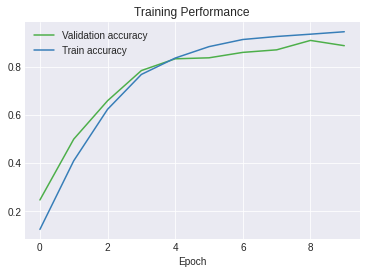

In [ ]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.plot(model.history.history['val_accuracy'], label='Validation accuracy', color = palette(2))
plt.plot(model.history.history["accuracy"], label='Train accuracy', color = palette(1))
plt.title("Training Performance")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
#evaluation model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

49/49 - 2s - loss: 0.6088 - accuracy: 0.8683 - 2s/epoch - 34ms/step

Test accuracy: 86.83035969734192 %


In [ ]:
#fine tuning
model.trainable=True

In [ ]:
model.fit(
    train_ds,
    epochs=7,
    validation_data=test_ds
)

Epoch 1/7
135/135 [==============================] - 11s 82ms/step - loss: 0.3075 - accuracy: 0.9092 - val_loss: 0.5462 - val_accuracy: 0.8850
Epoch 2/7
135/135 [==============================] - 11s 83ms/step - loss: 0.1588 - accuracy: 0.9510 - val_loss: 0.4809 - val_accuracy: 0.9001
Epoch 3/7
135/135 [==============================] - 11s 84ms/step - loss: 0.1277 - accuracy: 0.9602 - val_loss: 0.4828 - val_accuracy: 0.9074
Epoch 4/7
135/135 [==============================] - 11s 84ms/step - loss: 0.1118 - accuracy: 0.9650 - val_loss: 0.4844 - val_accuracy: 0.9018
Epoch 5/7
135/135 [==============================] - 11s 85ms/step - loss: 0.1167 - accuracy: 0.9647 - val_loss: 0.6456 - val_accuracy: 0.8955
Epoch 6/7
135/135 [==============================] - 11s 84ms/step - loss: 0.1139 - accuracy: 0.9670 - val_loss: 0.5325 - val_accuracy: 0.8983
Epoch 7/7
135/135 [==============================] - 11s 85ms/step - loss: 0.1011 - accuracy: 0.9701 - val_loss: 0.5021 - val_accuracy: 0.9035

In [ ]:
from sklearn.metrics import confusion_matrix

predicted_classes = model.predict(test_ds)
y_true = y_test

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)